# תרגיל 3:

## פתרון ידני:

### 2x + y = 3
### x + y + z = 0
### y + 3z = -1


In [ ]:
A = [2, 1, 0]    X = [x]    B = [3 ]  
    [1, 1, 1]        [y]        [0 ]
    [0, 1, 3]        [z]        [-1]

In [ ]:
det = 6(1*3-1*1) -1(1*3-1*0) +0(1*1-1*0) = 2(3-1)-1(3-0)

### det = 1

In [ ]:
C(11) = (1*3)-(1*1) = 2                                    [2, -3, 1]
C(12) = (1*3)-(1*0) = 3  --->  -3                          [-3, 6,-2]
C(13) = (1*1)-(1*0) = 1                                    [1, -2, 1]
C(21) = (1*3)-(0*1) = 3 ---->  -3                         
C(22) = (2*3)-(0*0) = 6
C(23) = (2*1)-(1*0) = 2 ---->  -2
C(31) = (1*1)-(0*1) = 1
C(32) = (2*1)-(0*1) = 2 ---->  -2
C(33) = (2*1)-(1*1) = 1

In [ ]:
Transpose, adj = [2, -3, 1]
                 [-3, 6,-2]
                 [1, -2, 1]

## A^-1 = 1/det(A) * adj(A)

In [ ]:
A^-1 = 1/1 * [2, -3, 1]
             [-3, 6,-2]
             [1, -2, 1]

## X = A^-1 * B


In [ ]:
X =  [2, -3, 1] * [3 ]
     [-3, 6,-2]   [0 ]
     [1, -2, 1]   [-1] 

In [ ]:
X = [(2 * 3) + (-3 * 0) + (1*-1)]
    [(-3 * 3) + (6 *0) + (-2*-1)]
    [(1 * 3) + (-2 * 0) + (1*-1)]

### X =
###   [ 5]
###   [-7]
###   [ 2]


## x = 5, y = -7, z = 2

# פתרון בקוד:

In [20]:
import numpy as np

def solve_linear_system(coefficients, constants):
    """
    Function to solve a system of linear equations with any number of unknowns
    
    :param coefficients: Coefficient matrix of the equations. nxn matrix
    :param constants: Vector of constant terms [b1, b2, ..., bn]
    :return: Solution of the system and details of calculation method
    """
    
    # Convert inputs to numpy arrays
    A = np.array(coefficients, dtype=float)
    b = np.array(constants, dtype=float)
    
   # Validate input dimensions
    n = b.shape[0]  # Number of equations/unknowns
    if A.shape != (n, n):
        raise ValueError(f"Input must be a system of {n} equations with {n} unknowns")
        
    results = {}
    
    det_A = np.linalg.det(A)
    
    if abs(det_A) < 1e-10:
        results["inverse"] = "Cannot compute inverse (singular matrix)"
    else:
         # Calculate inverse of coefficient matrix
        A_inv = np.linalg.inv(A)  # 1/det * adj = 1/det * [Cof^T}
        
        # Calculate solution x = A^(-1) * b
        solution = np.dot(A_inv, b)
        
        results["inverse"] = {
            "A_inverse": A_inv.tolist(),
            "solution": solution.tolist()
        }
       
    return results

# Example system:
# 3x + 2y = 14
# 2x + 5y = 19
### x – y = 8
### 3x + 2y = 24


coefficients = [[2, 1, 0], [1, 1, 1], [0, 1, 3]]
constants = [3, 0, -1]

results = solve_linear_system(coefficients, constants)

print("System of equations:")
print(f"{coefficients[0][0]}x + {coefficients[0][1]}y = {constants[0]}")
print(f"{coefficients[1][0]}x + {coefficients[1][1]}y + {coefficients[1][2]}z = {constants[1]}")
print(f"{coefficients[2][1]}y + {coefficients[2][2]}z = {constants[2]}")
print("\nResults:")

for method, result in results.items():
    if isinstance(result, dict):
        if "solution" in result:
            print(f"Solution: x = {result['solution'][0]:.2f}, y = {result['solution'][1]:.2f}, z = {result['solution'][2]:.2f}")
        for key, value in result.items():
            if key != "solution":
                print(f"{key}: {value}")
    else:
        print(result)


System of equations:
2x + 1y = 3
1x + 1y + 1z = 0
1y + 3z = -1

Results:
Solution: x = 5.00, y = -7.00, z = 2.00
A_inverse: [[2.0, -3.0, 1.0], [-3.0, 6.0, -2.0], [1.0, -2.0, 1.0]]


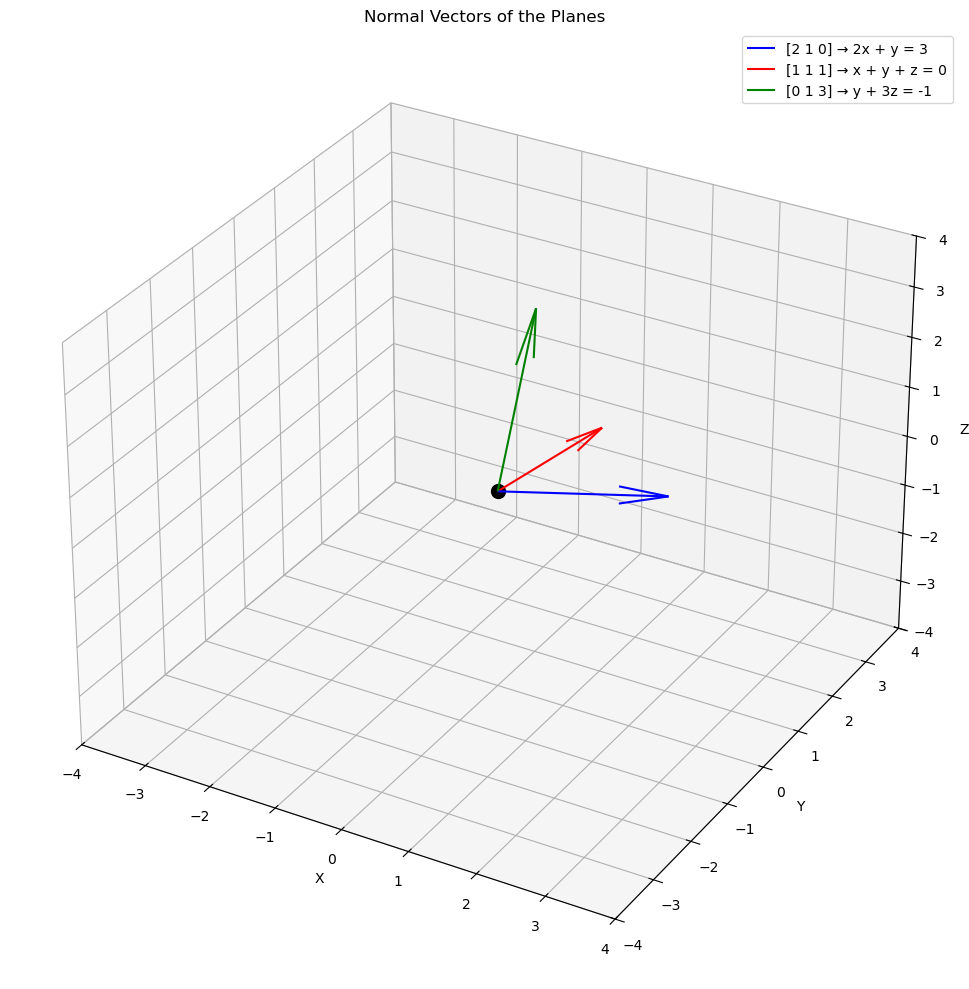

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_three_vectors(coefficients, constants):
    """
    Plots the coefficient vectors of three 3D linear equations (planes).
    """
    vec1 = np.array(coefficients[0])
    vec2 = np.array(coefficients[1])
    vec3 = np.array(coefficients[2])

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot origin
    ax.scatter(0, 0, 0, color='k', s=100)

    # Plot the 3 vectors
    ax.quiver(0, 0, 0, vec1[0], vec1[1], vec1[2], color='blue', label=f'{vec1} → 2x + y = 3')
    ax.quiver(0, 0, 0, vec2[0], vec2[1], vec2[2], color='red', label=f'{vec2} → x + y + z = 0')
    ax.quiver(0, 0, 0, vec3[0], vec3[1], vec3[2], color='green', label=f'{vec3} → y + 3z = -1')

    # Axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Title and legend
    ax.set_title('Normal Vectors of the Planes')
    ax.legend()

    # Set equal scaling
    all_vecs = np.array([vec1, vec2, vec3])
    max_range = np.max(np.abs(all_vecs)) + 1
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])

    plt.tight_layout()
    plt.show()

# Your system
coefficients = [[2, 1, 0], [1, 1, 1], [0, 1, 3]]
constants = [3, 0, -1]

plot_three_vectors(coefficients, constants)
